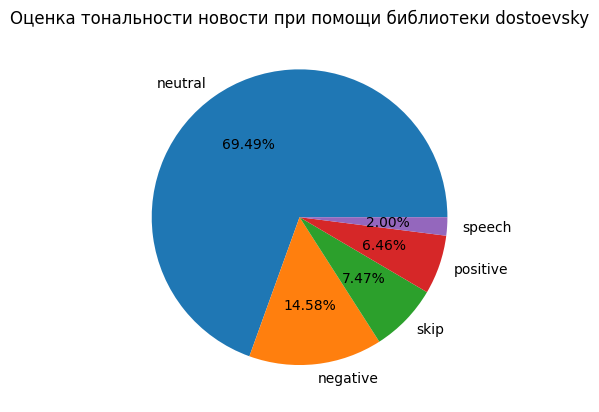

На основе полученных результатов можно сделать вывод о нейтральности выбранной новости


In [31]:
import requests
import bs4
import nltk
import re
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import matplotlib.pyplot as plt

# Локально установить библиотеку dostoevsky не удалось, поэтому работа выполнена в Google collab

url=r"https://www.gazeta.ru/business/news/2024/12/01/24517112.shtml"

response=requests.get(url) # Отправляем запрос
status_code=response.status_code
if status_code==200: # Проверяем код ответа
    soup=bs4.BeautifulSoup(response.text, features='html.parser') # Инициализация парсера
    article_all=soup.find('article') # Находим первый тег <article>
    article=article_all.find(class_='b_article-text') # Берем только нужную часть, пропуская заголовки, картинки и блок с комментированием
    text=article.get_text() # Получение текста
    text=text.replace("\xa0"," ") # Замена '&nbsp' на пробел
    text=text.replace("\n\n"," ") # Замена '\n\n' на пробел
    text=text.lower() # Переводим текст в нижний регистр
    nltk.download('stopwords', quiet=True) # Скачивание стоп-слов
    stopwords_ru = nltk.corpus.stopwords.words("russian") # Создание списка стоп-слов для русского языка
    words=[word for word in re.split(r";|\.| ", text) if word not in stopwords_ru] # Разбиение текста на слова с помощью re.split с удалением стоп-слов
    text=' '.join(words) # Обратная сборка в текст
    text=text.replace("  "," ") # Замена двух пробелов на один
    tokenizer = RegexTokenizer() # Инициализация "Достоевского"
    model = FastTextSocialNetworkModel(tokenizer=tokenizer) # Создание модели
    data = model.predict([text]) # Получение результата оценки новости
    plt.title ("Оценка тональности новости при помощи библиотеки dostoevsky")
    plt.pie(data[0].values(), labels=data[0].keys(), autopct='%.2f%%') # круговая диаграмма
    plt.show()
    print ("На основе полученных результатов можно сделать вывод о нейтральности выбранной новости")
else:
    print (f"Возникла ошибка при загрузке текста. Код ошибки: {status_code}")